## Linear regression

### Least squares
* The sum of the minimum distance for each point from the imaginary line that best describes the correlation between two data sets. See: np.polyfit

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

df = pd.read_csv('female_literacy_fertility.csv')
# Always strip (hidden) spaces from column names
df.columns = df.columns.str.strip()
df['population_in_mills'] = df['population'].str.replace(',', '').astype(int) / 1_000_000
df['population_in_mills'] = df['population_in_mills'].apply(lambda x: round(x, 2))
df['illiteracy'] = 100 - df['female literacy']
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 7 columns):
Country                162 non-null object
Continent              162 non-null object
female literacy        162 non-null float64
fertility              162 non-null float64
population             162 non-null object
population_in_mills    162 non-null float64
illiteracy             162 non-null float64
dtypes: float64(4), object(3)
memory usage: 9.0+ KB
None


Country Continent  female literacy  fertility     population  \
0      Chine       ASI             90.5      1.769  1,324,655,000   
1       Inde       ASI             50.8      2.682  1,139,964,932   
2        USA       NAM             99.0      2.077    304,060,000   
3  Indonésie       ASI             88.8      2.132    227,345,082   
4     Brésil       LAT             90.2      1.827    191,971,506   

   population_in_mills  illiteracy  
0              1324.65         9.5  
1              1139.96        49.2  
2               304.06         1.0  
3               227.35        11.2  
4               191.97         9.8

In [2]:
# Count Countries, it seems to be the PK and should eq row count
if len(df['Country'].unique()) != df.shape[0]:
    raise ValueError('the number of rows in the df:', df.shape[0], ' should be eq to the number of Countries:',
                    len(df['Country'].unique()))

In [3]:
# Display the Continents
df['Continent'].unique()

array(['ASI', 'NAM', 'LAT', 'AF', 'EUR', 'OCE'], dtype=object)

In [4]:
df.describe()

female literacy   fertility  population_in_mills  illiteracy
count       162.000000  162.000000           162.000000  162.000000
mean         80.107407    2.878673            40.687037   19.892593
std          23.052415    1.427597           140.968965   23.052415
min          12.600000    0.966000             0.100000    0.000000
25%          66.425000    1.823250             3.370000    1.500000
50%          90.000000    2.367500             9.705000   10.000000
75%          98.500000    3.880250            28.832500   33.575000
max         100.000000    7.069000          1324.650000   87.400000

In [5]:
# Investigate some of the mins and maxes
#df.loc[df['female literacy'] > 99.9]
#df.loc[df['population_in_mills'] > 300]
df.loc[df['fertility'] > 6]

Country Continent  female literacy  fertility  population  \
36      Ouganda        AF             66.8      6.254  31,656,865   
39  Afghanistan       ASI             12.6      6.505  29,021,099   
62        Niger        AF             15.1      7.069  14,704,318   
72        Tchad        AF             21.9      6.081  10,913,667   

    population_in_mills  illiteracy  
36                31.66        33.2  
39                29.02        87.4  
62                14.70        84.9  
72                10.91        78.1

In [6]:
import matplotlib.pyplot as plt

# get matplot to show charts inline
%matplotlib inline

np.random.seed(42)

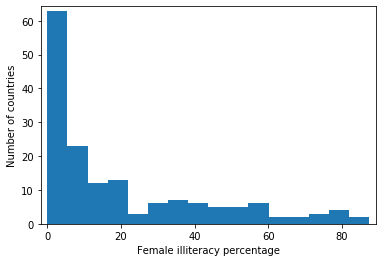

In [7]:
_ = plt.hist(df['illiteracy'], bins=16)
_ = plt.xlabel('Female illiteracy percentage')
_ = plt.ylabel('Number of countries')
_ = plt.margins(0.02)

# Show the plot
plt.show()

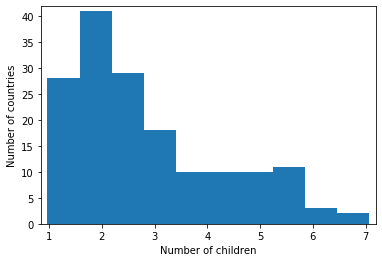

In [8]:
_ = plt.hist(df['fertility'])
_ = plt.xlabel('Number of children')
_ = plt.ylabel('Number of countries')
_ = plt.margins(0.02)

# Show the plot
plt.show()

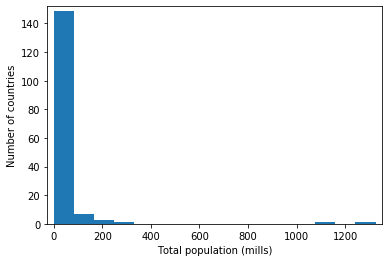

In [9]:
_ = plt.hist(df['population_in_mills'], bins=16)
_ = plt.xlabel('Total population (mills)')
_ = plt.ylabel('Number of countries')
_ = plt.margins(0.02)

# Show the plot
plt.show()

In [10]:
# Obtain some values grouped by Continent
# Total population count in mills per Continent
df.groupby('Continent')['population_in_mills'].sum().sort_values()

Continent
OCE      11.26
NAM     337.37
LAT     556.39
EUR     717.63
AF      971.26
ASI    3997.39
Name: population_in_mills, dtype: float64

In [11]:
# Mean illiteracy percentage per Continent
df.groupby('Continent')['illiteracy'].mean().sort_values()

Continent
NAM     1.000000
EUR     1.775000
LAT     9.533333
OCE    16.850000
ASI    17.031915
AF     42.040816
Name: illiteracy, dtype: float64

In [12]:
# Mean fertility rate per Continent
df.groupby('Continent')['fertility'].mean().sort_values()

Continent
EUR    1.548417
NAM    1.828000
LAT    2.448375
ASI    2.513511
OCE    3.442500
AF     4.413878
Name: fertility, dtype: float64

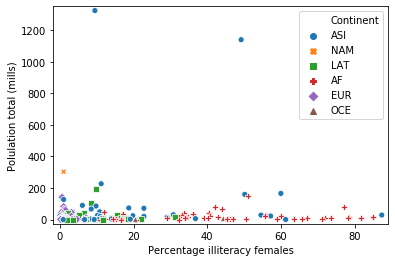

Correlation coefficient: 0.046497437936134665


In [13]:
import seaborn as sns

_ = sns.scatterplot(x='illiteracy', y='population_in_mills', data=df, hue='Continent', style='Continent')
_ = plt.xlabel('Percentage illiteracy females')
_ = plt.ylabel('Polulation total (mills)')
_ = plt.margins(0.02)

plt.show()

%run pearson_r.ipynb

# Show the Pearson correlation coefficient
print('Correlation coefficient:', pearson_r(df['illiteracy'], df['population_in_mills']))

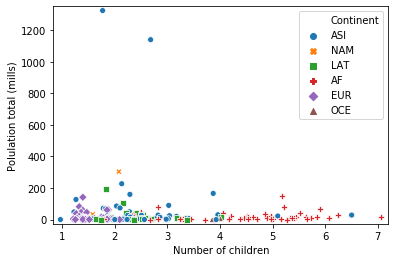

Correlation coefficient: -0.07061767445499756


In [14]:
_ = sns.scatterplot(x='fertility', y='population_in_mills', data=df, hue='Continent', style='Continent')
_ = plt.xlabel('Number of children')
_ = plt.ylabel('Polulation total (mills)')
_ = plt.margins(0.02)

plt.show()

# Show the Pearson correlation coefficient
print('Correlation coefficient:', pearson_r(df['fertility'], df['population_in_mills']))

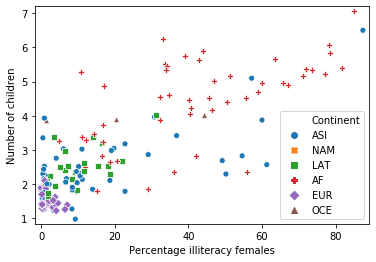

Correlation coefficient: 0.8041324026815344


In [15]:
import seaborn as sns

_ = sns.scatterplot(x='illiteracy', y='fertility', data=df, hue='Continent', style='Continent')
_ = plt.xlabel('Percentage illiteracy females')
_ = plt.ylabel('Number of children')
_ = plt.margins(0.02)

plt.show()

# Show the Pearson correlation coefficient
print('Correlation coefficient:', pearson_r(df['illiteracy'], df['fertility']))

### Linear regression
We will assume that fertility is a linear function of the female illiteracy rate. That is, ```f = ai + b```, where a is the slope and b is the intercept on the x axis. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy.

Slope = 0.04979854809063423 children per woman / percent illiterate
Intercept on the y axis = 1.888050610636557 children per woman


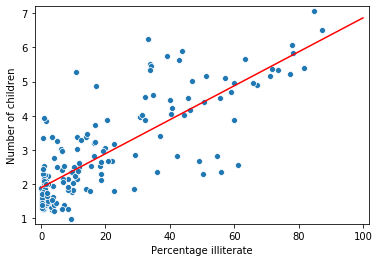

In [16]:
a, b = np.polyfit(df['illiteracy'], df['fertility'], deg=1)

# Print the results to the screen
print('Slope =', a, 'children per woman / percent illiterate')
print('Intercept on the y axis =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = sns.scatterplot(x='illiteracy', y='fertility', data=df,)
_ = plt.plot(x, y, 'r')
_ = plt.xlabel('Percentage illiterate')
_ = plt.ylabel('Number of children')
_ = plt.margins(0.02)

# Draw the plot
plt.show()

* Could it be expected that a female will have approx 1 additional child for every 25% increase in illiteracy rate?

In [17]:
kids_at_20 = a * 20 + b
print('Number of children at 20% illiteracy rate:', kids_at_20)
kids_at_45 = a * 45 + b
print('Number of children at 45% illiteracy rate:', kids_at_45)
print('Additional child at 25% increase in illiteracy rate:', kids_at_45 - kids_at_20)

Number of children at 20% illiteracy rate: 2.8840215724492415
Number of children at 45% illiteracy rate: 4.128985274715097
Additional child at 25% increase in illiteracy rate: 1.2449637022658555


### Bootstrapping
The use of re-sampled data to perform statistical inference 

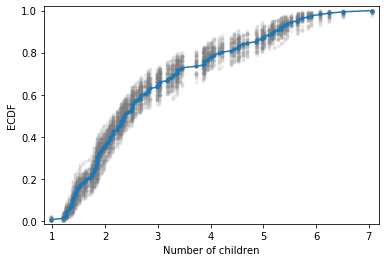

In [18]:
%run ECDF.ipynb

for _ in range(50):
    resampled_fertility = np.random.choice(df['fertility'], df.shape[0])
    x, y = compute_ecdf(resampled_fertility)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

x, y = compute_ecdf(df['fertility'])
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('Number of children')
_ = plt.ylabel('ECDF')
_ = plt.margins(0.02)


plt.show()

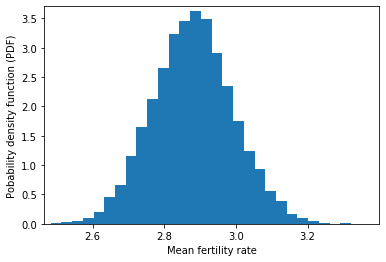

In [21]:
%run bootstrap_replicate_1d.ipynb

bs_replicate_statistic = np.empty(10_000)

for i in range(10_000):
    bs_replicate_statistic[i] = bootstrap_replicate_1d(df['fertility'], np.mean)
    
_ = plt.hist(bs_replicate_statistic, bins=30, density=True)
_ = plt.xlabel('Mean fertility rate')
_ = plt.ylabel('Pobability density function (PDF)')
_ = plt.margins(0.02)

# Show the plot
plt.show()    

### Confidence interval of a statistic
If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval

In [22]:
np.percentile(bs_replicate_statistic, [2.5, 97.5])

array([2.66029753, 3.10224892])

### PDF of wines

SEM: 0.0021573715292984973
Std of bs_replicates: 0.0021561155733299956


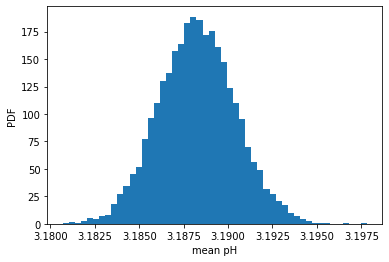

In [25]:
df_wine = pd.read_csv('winequality-white.csv', sep=';')
df_wine.head()

%run draw_bs_reps.ipynb

bs_replicates = draw_bs_reps(df_wine['pH'], np.mean, size=10_000)

# Compute and print SEM
sem = np.std(df_wine['pH']) / np.sqrt(len(df_wine['pH']))
print('SEM:', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Std of bs_replicates:', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean pH')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [27]:
df_wine = None
np.percentile(bs_replicates, [2.5, 97.5])

array([3.18406901, 3.19254196])

### Pairs bootstrap
* Resample data in pairs
* Compute slope and y intercept from resampled data
* Each slope and intercept is a bootstrap replicate
* Compute confidence intervals from percentiles of the bootstrap replicates

95% CI for slope: [0.04415749 0.05549525]


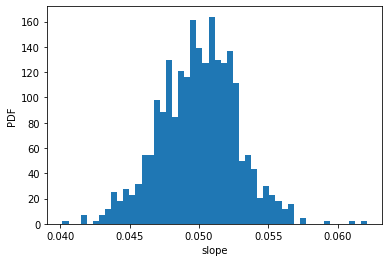

In [28]:
%run draw_bs_pairs_linreg.ipynb

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df['illiteracy'], df['fertility'], size=1_000)

# Compute and print 95% CI for slope
print('95% CI for slope:', np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

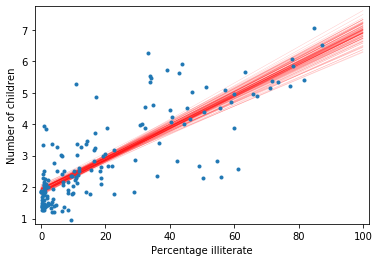

In [29]:
# Plot the first 100 bootstrap replicates

# Generate array of x-values for bootstrap lines
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(df['illiteracy'], df['fertility'], marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Percentage illiterate')
_ = plt.ylabel('Number of children')
_ = plt.margins(0.02)

plt.show()